# STATISTICAL ANALYSIS ON FACTORS INFLUENCING LIFE EXPECTANCY 

BY

Group P17
1. Ahmad Mustapha Wali (407),
2. Lara Tomeh (407),
3. Alexandru-Ștefan Ghiță (407).

Being our project for Exploratory Data Analysis

# ABOUT THE DATASET

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to the public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years, there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

# COLUMNS

•	country - the country from which the indicators originate

•	year - the calendar year in which the indicators were created

•	status - whether a country is classified as 'Developing' or 'Developed' by the World Health Organization

•	life_expectancy - the life expectancy of a person in years for a specific country and year

•	adult_mortality - the adult mortality rate as a percentage of the total population (i.e. number of people dying between 15 and 60 years per 1000 population)

•	infant_deaths - Infant mortality rate per 1000 population

•	alcohol- The rate of alcohol consumption in a nation is expressed in liters of pure alcohol consumed per capita.

•	percentage_expenditure - health expenditures as a proportion of GDP 

•	hepatitis_b - Number of one-year-olds immunized against Hepatitis B as a percentage of all one-year-olds in the population

•	measles - Measles cases recorded per 1000 population

•	bmi - A country's whole population's average Body Mass Index (BMI).

•	under-five_deaths - number of people under the age of five deaths per 1000 population

•	polio - The proportion of one-year-olds immunized against Polio compared to the total population of one-year-olds

•	total_expenditure - Health expenditures as a proportion of overall government spending

•	diphtheria - Immunization rate of one-year-olds against diphtheria, tetanus toxoid, and pertussis (DTP3)

•	hiv/aids - HIV/AIDS-related deaths per 1000 live births among children under the age of five; number of children under the age of five that die as a result of HIV/AIDS per 1000 live births

•	gdp - Gross Domestic Product per capita

•	population - population of a country

•	thinness_1-19_years - rate of thinness among people aged 10-19 

•	thinness_5-9_years - rate of thinness among people aged 5-9

•	income_composition_of_resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

•	schooling - average number of years of schooling of a population

# Exploratory Data Analysis

In [318]:
# Importing necessary libraries and modules for data analysis and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy import stats

# Setting up inline plotting for Jupyter notebooks
%matplotlib inline

# Importing specific modules from scikit-learn for machine learning tasks
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [319]:
# Reading a CSV file ('Life Expectancy Data.csv') into a Pandas DataFrame named 'df'
df = pd.read_csv('Life Expectancy Data.csv')

# Displaying the column names of the DataFrame 'df'
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

On inspecting the column names in the dataset, some irregularities can be observed. Several of the columns, e.g '*under-five deaths ' and 'Hepatitis B*', are not consistent with regards to spacing. The columns will be renamed for better consistency. '* thinness 1-19 years*' will also be renamed to '*Thinness_10_19_years*' since it is most likely a mistake considering another column exists as '*thinness 5-9 years*'.

In [320]:
# Renaming columns in the DataFrame 'df' for better clarity
df.columns = ['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
              'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
              'Measles', 'BMI', 'Under_five_deaths', 'Polio',
              'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
              'Thinness_10-19_years', 'Thinness_5-9_years',
              'Income_composition_of_resources', 'Schooling']

In [321]:
# Checking for missing values in each column of the DataFrame
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_10-19_years                34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

We can observe 3 dtypes of floats, ints and objects. There are also many columns that contain null values. To fill the null values, we used the mean value of each  column.

In [322]:
# Imputing missing values in numeric columns of the DataFrame 'df' with column means
df = df.apply(lambda col: col.fillna(col.mean()) if pd.api.types.is_numeric_dtype(col) else col)

In [323]:
'''
Getting an overview of the dataset. Displaying the mean, standard deviation, minimum and maximum values, 
and the quartiles (25%, 50%, and 75%) for each numeric column in the DataFrame 'df'.
'''
df.describe()

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


A brief inspection of the dataset description shows the presence of many outliers. Adult mortality of 0.1% seems unreasonable (min Adult_mortality = 1), and a country can not spend 19479.911610% of its income on health, etc. Various methods of checking and correcting outliers exist. For this project, we used boxplots for easy visual detection of the outliers, and winsorization to correct them. Both methods provide and easy and computationally-light-weight way of dealing with outliers.

In [324]:
# Displaying the data types of each column in the DataFrame
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Percentage_expenditure             float64
HepatitisB                         float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_10-19_years               float64
Thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

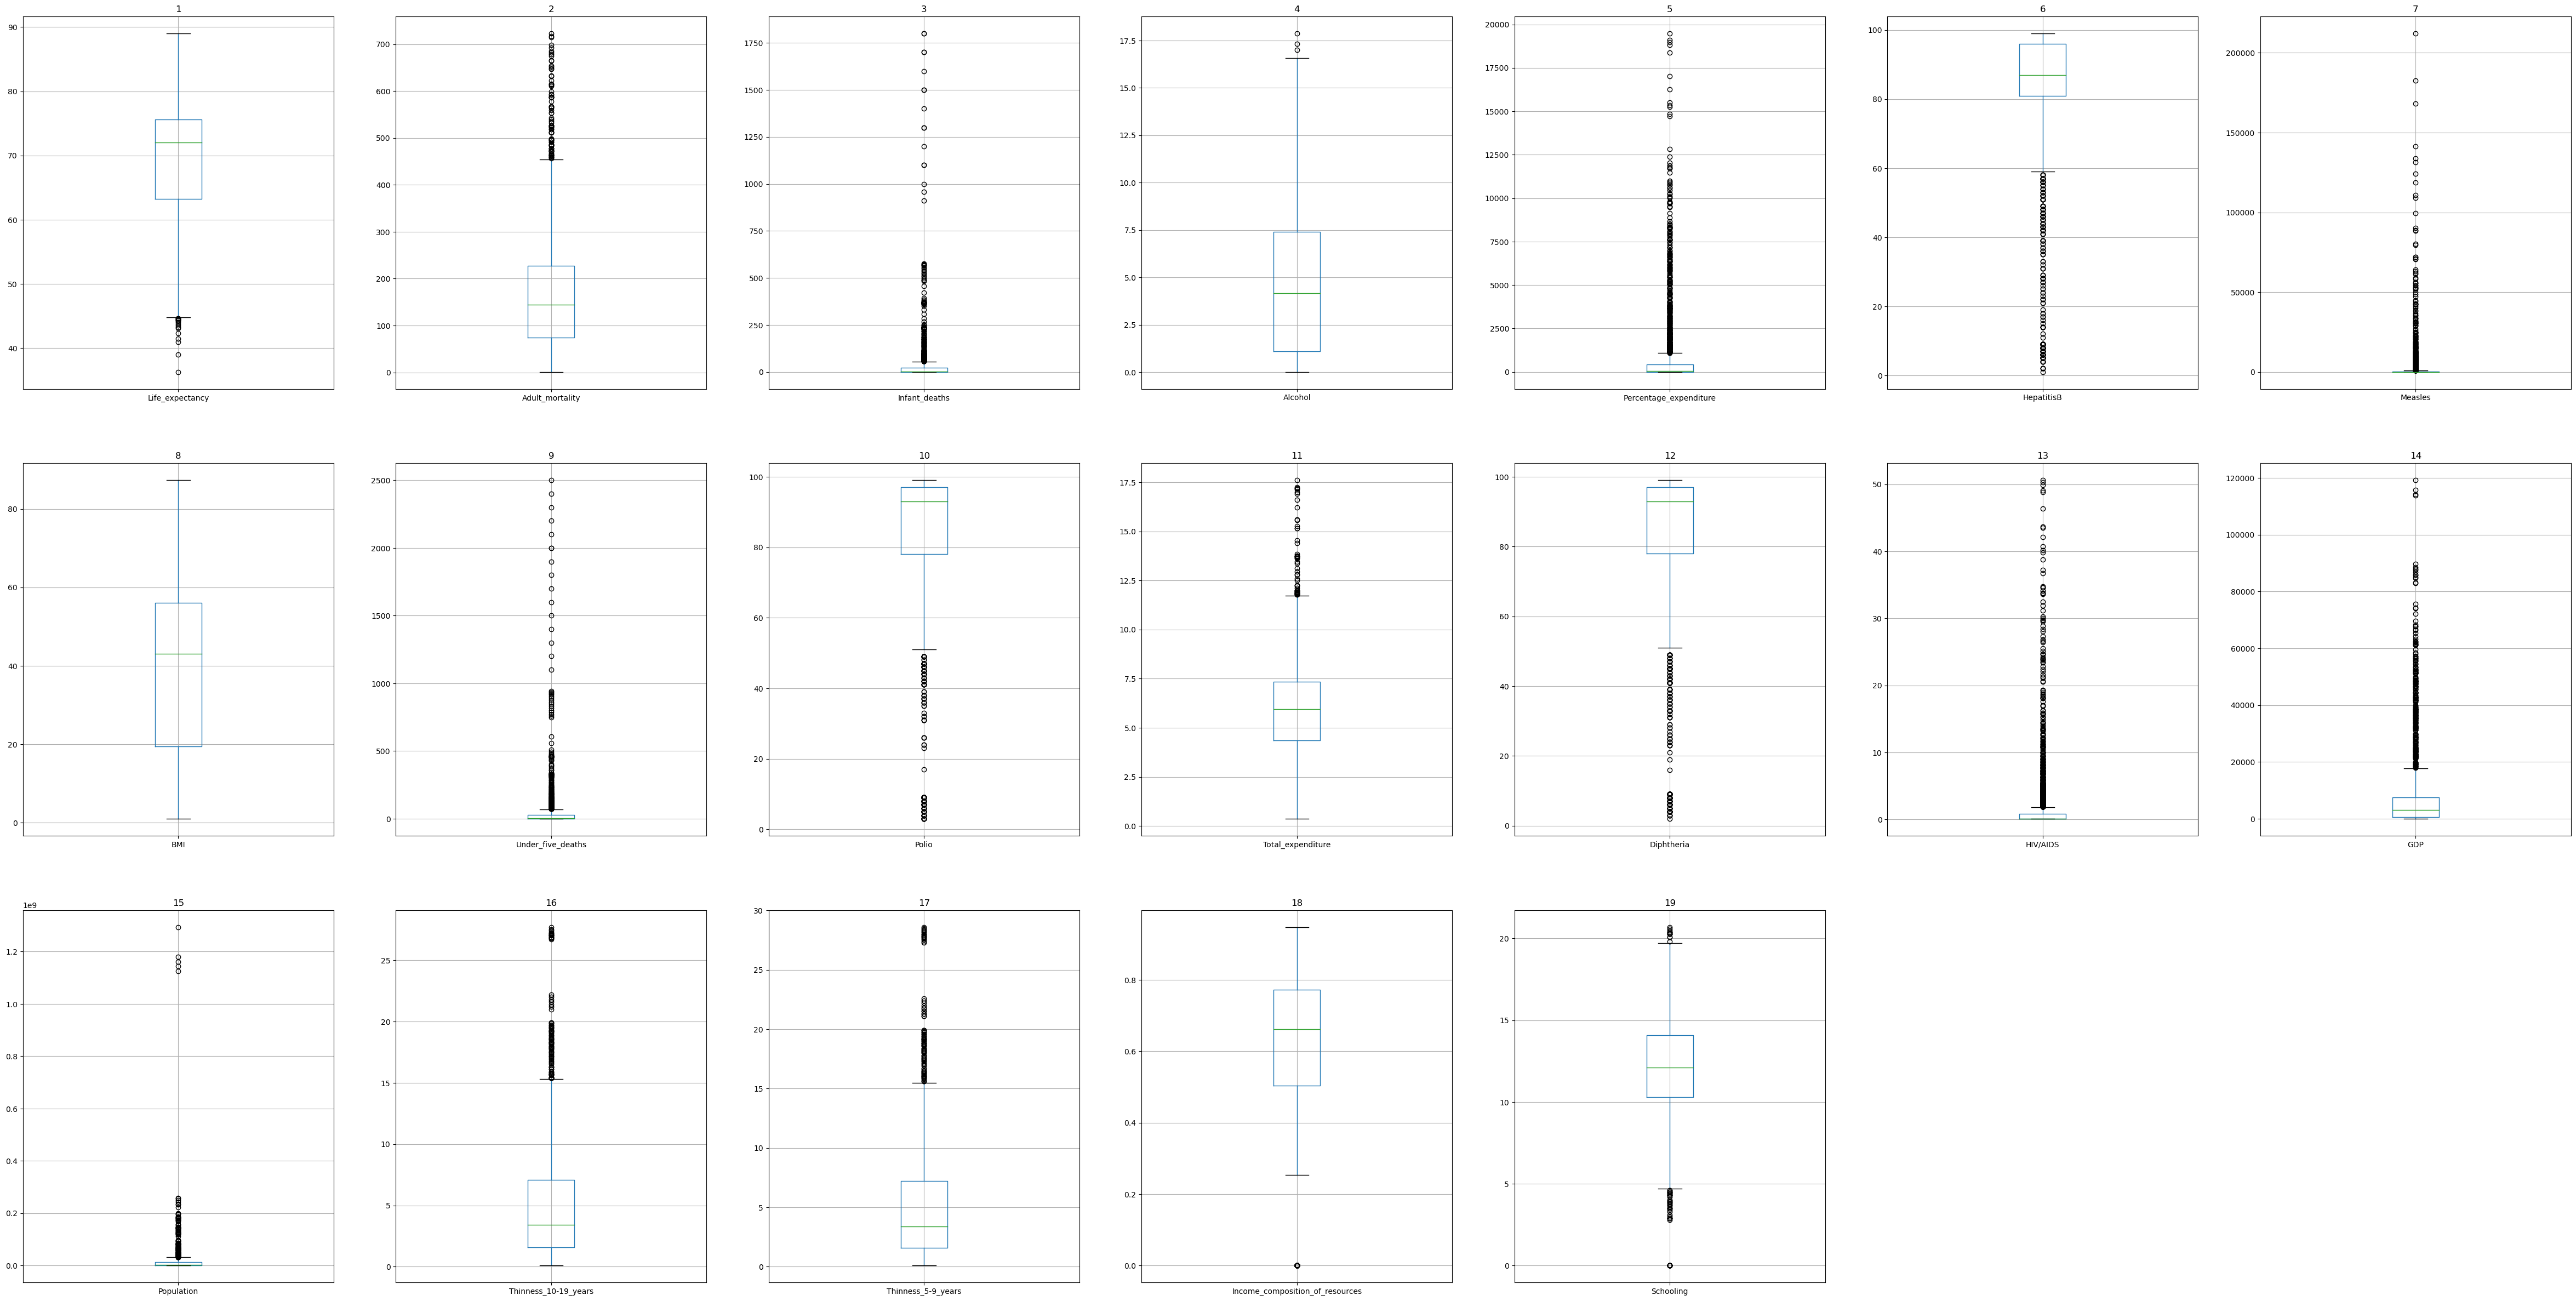

In [325]:
# Selecting numerical columns from the DataFrame 'df'
columns_list = df.select_dtypes(['int', 'float']).columns[1:]

# Creating a boxplot grid for visualization
fig = plt.figure(figsize=(60, 30))

# Plotting boxplots for each numerical column
for i, col in enumerate(columns_list, start=1):
    plt.subplot(3, 7, i)
    df.boxplot(col)
    plt.title(i)
    plt.grid(True)

There seem to be many outliers and irregularities with the dataset. 

i)'*Infant_deaths*', '*Measles*', and '*Under_five_deaths*', which are all per 1000 population (thus shouldn't be above 1000) all have values above 1000. To deal with this, we drop all values not less than 1000 since they are probably a mistake, and there is no way we can know their actual values.

ii) '*Percentage_expenditure*' is unreasonably high. Also '*Population*' and '*GDP*' have been affected by the few countries having a very high population of more than 1 billion (China and India) and GDP per capita (Qatar, Norway,etc.) respectively to create too many outliers. To deal with this category, we take the log of these columns. 

iii) For the rest of the columns with outliers, we winsorize them by changing their quartile limits.

In [326]:
# Dropping data points with abnormal values in specific columns
df = df[df['Infant_deaths'] < 1001]
df = df[df['Measles'] < 1001]
df = df[df['Under_five_deaths'] < 1001]

In [327]:
# Normalizing specific columns by taking the logarithm of their values
df['Infant_deaths'] = np.log(df['Infant_deaths'])
df['Measles'] = np.log(df['Measles'])
df['Under_five_deaths'] = np.log(df['Under_five_deaths'])
df['Percentage_Expenditure_Winsorized'] = np.log(df['Percentage_expenditure'])
df['GDP_Winsorized'] = np.log(df['GDP'])

# Replacing infinite values resulting from logarithmic transformation with 0
df = df.replace([np.inf, -np.inf], 0)

c:\Users\Ahmad Wali\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [328]:
'''
Dealing with outliers using Winsorization. The first argument in the tuple on the right
represents the lower limit quartile, while the second represents the upper limit quartile.
'''
df['Under_five_deaths'] = winsorize(df['Under_five_deaths'], (0.05, 0.05))
df['Measles'] = winsorize(df['Measles'], (0.05, 0.05))
df['Infant_deaths'] = winsorize(df['Infant_deaths'], (0.05, 0.05))
df['Life_Expectancy_Winsorized'] = winsorize(df['Life_expectancy'], (0.05, 0))
df['Adult_Mortality_Winsorized'] = winsorize(df['Adult_mortality'], (0, 0.04))
df['Alcohol_Winsorized'] = winsorize(df['Alcohol'], (0.0, 0.01))
df['HepatitisB_Winsorized'] = winsorize(df['HepatitisB'], (0.2, 0.0))
df['Polio_Winsorized'] = winsorize(df['Polio'], (0.20, 0.0))
df['Total_Expenditure_Winsorized'] = winsorize(df['Total_expenditure'], (0.0, 0.02))
df['Diphtheria_Winsorized'] = winsorize(df['Diphtheria'], (0.11, 0.0))
df['HIV_AIDS_Winsorized'] = winsorize(df['HIV/AIDS'], (0.0, 0.21))
df['Thinness_10_to_19_years_Winsorized'] = winsorize(df['Thinness_10-19_years'], (0.0, 0.04))
df['Thinness_5_to_9_years_Winsorized'] = winsorize(df['Thinness_5-9_years'], (0.0, 0.04))
df['Income_Composition_Of_Resources_Winsorized'] = winsorize(df['Income_composition_of_resources'], (0.05, 0.0))
df['Schooling_Winsorized'] = winsorize(df['Schooling'], (0.03, 0.01))
df['Log_Population_Winsorized'] = winsorize(df['Population'], (0, 0.05))
df['GDP_Winsorized'] = winsorize(df['GDP_Winsorized'], (0.01, 0.0))

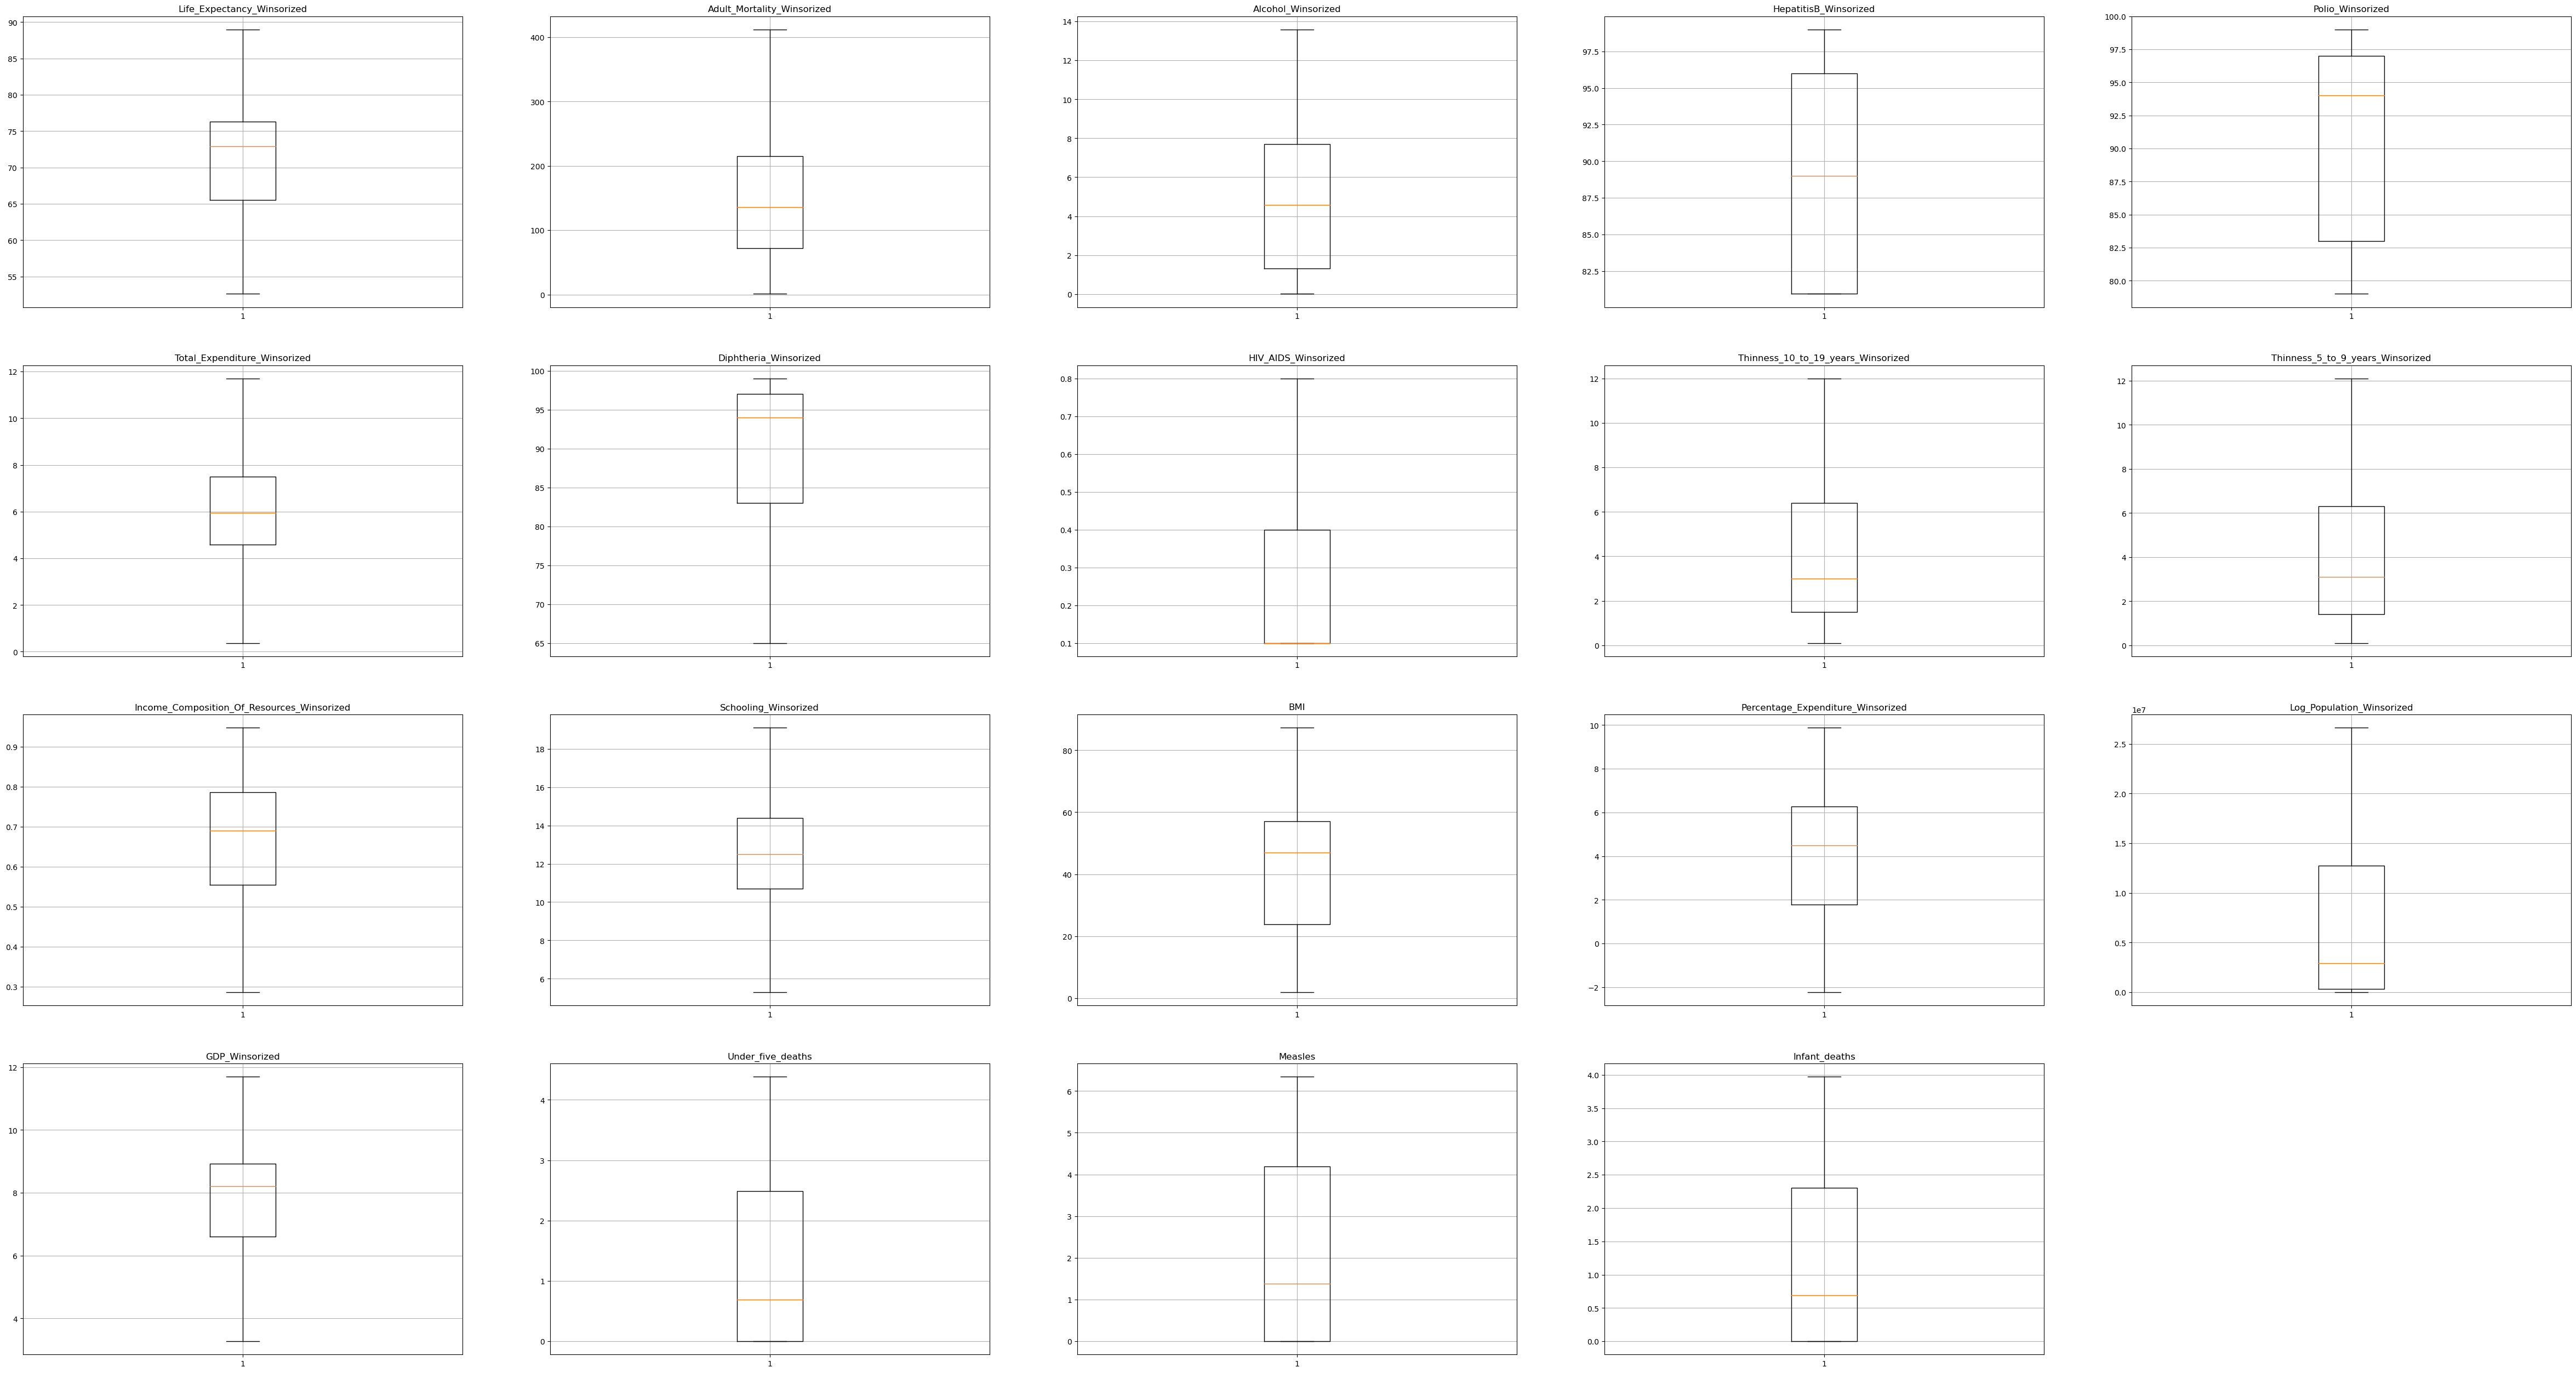

In [329]:
# List of columns with outliers removed using Winsorization
outlier_free_cols = [
    'Life_Expectancy_Winsorized',
    'Adult_Mortality_Winsorized',
    'Alcohol_Winsorized',
    'HepatitisB_Winsorized',
    'Polio_Winsorized',
    'Total_Expenditure_Winsorized',
    'Diphtheria_Winsorized',
    'HIV_AIDS_Winsorized',
    'Thinness_10_to_19_years_Winsorized',
    'Thinness_5_to_9_years_Winsorized',
    'Income_Composition_Of_Resources_Winsorized',
    'Schooling_Winsorized',
    'BMI',
    'Percentage_Expenditure_Winsorized',
    'Log_Population_Winsorized',
    'GDP_Winsorized', 
    'Under_five_deaths',
    'Measles',
    'Infant_deaths'
]

# Creating boxplots for columns with outliers removed
fig = plt.figure(figsize=(60, 40))
for i, variable in enumerate(outlier_free_cols):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)
    plt.ylabel('')
    plt.grid(True)

plt.show()

A second boxplot of the winsorized data shows that the outliers have been removed.

# Data Analysis and Statistical Modeling

In [330]:
# Creating another dataset with clean data by selecting specific columns from the original DataFrame 'df'
cleaned_dataset = df[[
    'Year', 
    'Country', 
    'Status',
    'Life_Expectancy_Winsorized',
    'Adult_Mortality_Winsorized',
    'Infant_deaths',
    'Alcohol_Winsorized',
    'BMI',
    'Percentage_Expenditure_Winsorized',
    'HepatitisB_Winsorized',
    'Measles',
    'Under_five_deaths',
    'Polio_Winsorized',
    'Total_Expenditure_Winsorized',
    'Diphtheria_Winsorized',
    'HIV_AIDS_Winsorized',
    'GDP_Winsorized',
    'Log_Population_Winsorized',
    'Thinness_10_to_19_years_Winsorized',
    'Thinness_5_to_9_years_Winsorized',
    'Income_Composition_Of_Resources_Winsorized',
    'Schooling_Winsorized'
]]

In [331]:
# Creating a histogram for the distribution of life expectancy in developing nations
hist_df_1 = cleaned_dataset[cleaned_dataset['Status'] == 'Developing'].groupby(['Country', 'Status'])['Life_Expectancy_Winsorized'].mean().reset_index()

# Plotting the histogram using Plotly Express
fig = px.histogram(hist_df_1, x='Life_Expectancy_Winsorized', template='plotly_dark', title='Life Expectancy Distribution in Developing Nations')
fig.update_layout(width=800, height=600, yaxis_title='Frequency', xaxis_title='Life Expectancy')
fig.show()

In [332]:
# Creating a histogram for the distribution of life expectancy in developed nations
hist_df_2 = cleaned_dataset[cleaned_dataset['Status'] == 'Developed'].groupby(['Country', 'Status'])['Life_Expectancy_Winsorized'].mean().reset_index()

# Plotting the histogram using Plotly Express
fig = px.histogram(hist_df_2, x='Life_Expectancy_Winsorized', title='Life Expectancy Distribution in Developed Nations', template='plotly_dark')
fig.update_layout(width=800, height=600, yaxis_title='Frequency', xaxis_title='Life Expectancy')
fig.show()

In [333]:
# Creating a violin plot for average life expectancy based on countries' status
violin_df = df.groupby(['Country', 'Status'])['Life_expectancy'].mean().reset_index()

# Plotting the violin plot using Plotly Express
fig = px.violin(violin_df, x='Status', y='Life_expectancy', color='Status', template='plotly_dark', box=True, title='Average Life Expectancy Based on Countries Status')
fig.update_layout(width=800, height=600, xaxis_title='Status', yaxis_title='Life Expectancy')
fig.show()

`Residents in developed countries have, on average, 10 years higher life expectancy than those in developing countries on average (70 years). As can also be observed in the figure below, the country with the lowest life expectancy is *Angola*, a developing country; while the one with the one with the highest is *France*, a developed country. On closer observation, most of the countries below the 75th percentile are developing countries, while most of those above it are developed nations.`

In [334]:
# Create a choropleth map for country-wise life expectancy over the years
fig = px.choropleth(
    cleaned_dataset.sort_values(by='Year'),
    locations='Country',
    locationmode='country names',
    color='Life_Expectancy_Winsorized',
    animation_frame='Year',
    title='Country-wise Life Expectancy Over The Years',
    color_continuous_scale='Viridis',
    template='plotly_dark')

fig.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="white",
        showland=True,
        landcolor="lightgray",
        showcountries=True,
        countrycolor="white"
    ),
    width=1000,
    height=600 
)

fig.show()

In [335]:
# Create a scatter plot for life expectancy versus adult mortality
df_1 = cleaned_dataset.groupby(['Country', 'Status'])[['Life_Expectancy_Winsorized', 'Adult_Mortality_Winsorized']].mean().reset_index()

fig = px.scatter(
    df_1,
    y='Adult_Mortality_Winsorized', 
    x='Life_Expectancy_Winsorized',
    color='Status', 
    size='Life_Expectancy_Winsorized',
    template='plotly_dark',
    opacity=0.6,
    title='Life Expectancy Versus Adult Mortality')

fig.update_layout(
    width=800, 
    height=600, 
    xaxis_title='Life Expectancy', 
    yaxis_title='Adult Mortality')

The graph also shows that there is a difference in life expectancy and adult mortality between developing and developed countries. Developed countries have higher life expectancies and lower adult mortality rates than developing countries. This is due to a number of factors, such as better healthcare, higher incomes, and lower levels of poverty.

In [336]:
# Sort the average life expectancy in ascending order per country 
country_and_life_expectancy = cleaned_dataset.groupby('Country')['Life_Expectancy_Winsorized'].mean().sort_values(ascending = True)

fig = px.bar(country_and_life_expectancy)
fig.update_layout(
    width=1500, 
    height=800, 
    xaxis_title='Status', 
    yaxis_title='Life Expectancy', 
    font_size=10, 
    title='Countries Sorted by Life Expectancy')

In [337]:
# Select 10 countries with the lowest and highest life expectancies respectively
selected_countries = ['Angola', 'Somalia', 'Nigeria', 'Lesotho', 'Sierra Leone', 'Iceland', 'Sweden', 'Italy', 'Japan', 'France']
selected_countries_df = cleaned_dataset[cleaned_dataset['Country'].isin(selected_countries[:5])]

In [338]:
# Life expectanct trends for the countries with the lowest life expectancies
px.line(
    selected_countries_df, 
    x='Year', 
    y='Life_Expectancy_Winsorized', 
    color='Country', 
    hover_data=['Schooling_Winsorized', 'Income_Composition_Of_Resources_Winsorized', 'Total_Expenditure_Winsorized', 'Adult_Mortality_Winsorized'],
    title='Trends in Countries with the Lowest Life Expectancies'
)

An analysis of life expectancy trends in five African nations – Angola, Lesotho, Nigeria, Sierra Leone, and Somalia – reveals positive but uneven progress since 2000. While all observed increases, Lesotho demonstrated the most significant rise, followed by Angola and Nigeria. Sierra Leone and Somalia, however, experienced comparatively subdued advancements.

In [339]:
# Trends for the countries with the highest life expectancies
selected_countries = ['Angola', 'Somalia', 'Nigeria', 'Lesotho', 'Sierra Leone', 'Iceland', 'Sweden', 'Italy', 'Japan', 'France']
selected_countries_df = cleaned_dataset[cleaned_dataset['Country'].isin(selected_countries[-5:])]
px.line(
    selected_countries_df, 
    x='Year', 
    y='Life_Expectancy_Winsorized', 
    color='Country', 
    hover_data=['Schooling_Winsorized', 'Income_Composition_Of_Resources_Winsorized', 'Total_Expenditure_Winsorized', 'Adult_Mortality_Winsorized'],
    title='Trends in Countries with the Highest Life Expectancies'
)

Life expectancy in these countries has been steadily increasing since 2000, with all five countries now boasting life expectancies over 82 years. France currently has the highest life expectancy at 88 years, followed by Iceland at 85 years and Italy and Japan at 84 years. Sweden has the lowest life expectancy among these five countries at 82 years. An upward trend can also be observed in their education, healthcare spending and overall income.

In [340]:
# Create a scatter plot for life expectancy versus infant mortality with OLS trendline
df_3 = cleaned_dataset.groupby(['Country', 'Status'])[['Life_Expectancy_Winsorized', 'Infant_deaths']].mean().reset_index()

fig = px.scatter(
    df_3,
    y='Infant_deaths', 
    x='Life_Expectancy_Winsorized',
    trendline='ols',
    template='plotly_dark',
    opacity=0.6,
    title='Life Expectancy Versus Infant Mortality')

fig.update_layout(
    width=800, 
    height=600, 
    xaxis_title='Life Expectancy', 
    yaxis_title='Infant Mortality')

In [341]:
df_2 = cleaned_dataset.groupby(['Country', 'Status'])[['Life_Expectancy_Winsorized', 'Percentage_Expenditure_Winsorized']].mean().reset_index()

fig = px.scatter(
    df_2,
    x='Life_Expectancy_Winsorized',
    y='Percentage_Expenditure_Winsorized',
    template='plotly_dark',
    trendline='ols',
    title='Life Expectancy Versus Percentage Expenditure on Health')

fig.update_layout(
    width=800, 
    height=600, 
    xaxis_title='Life Expectancy', 
    yaxis_title='Percentage Expenditure (Log)')


fig.show()

In [342]:
# Extract relevant columns
schooling = cleaned_dataset["Schooling_Winsorized"]  
life_expectancy = cleaned_dataset["Life_Expectancy_Winsorized"]  

# Divide into groups based on the median schooling value
median_schooling = cleaned_dataset["Schooling_Winsorized"].median()

higher_schooling = cleaned_dataset[cleaned_dataset["Schooling_Winsorized"] > median_schooling]
lower_schooling = cleaned_dataset[cleaned_dataset["Schooling_Winsorized"] <= median_schooling]

# Conduct t-test on these two groups
t_statistic, p_value = stats.ttest_ind(
    higher_schooling["Life_Expectancy_Winsorized"],
    lower_schooling["Life_Expectancy_Winsorized"],
    equal_var=False
)

# Interpret the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:  # Assuming a significance level of 0.05
    print("Reject the null hypothesis. There is significant evidence of a positive relationship between schooling and life expectancy.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of a positive relationship was found.")

T-statistic: 39.585893371464365
P-value: 5.991307791960645e-254
Reject the null hypothesis. There is significant evidence of a positive relationship between schooling and life expectancy.


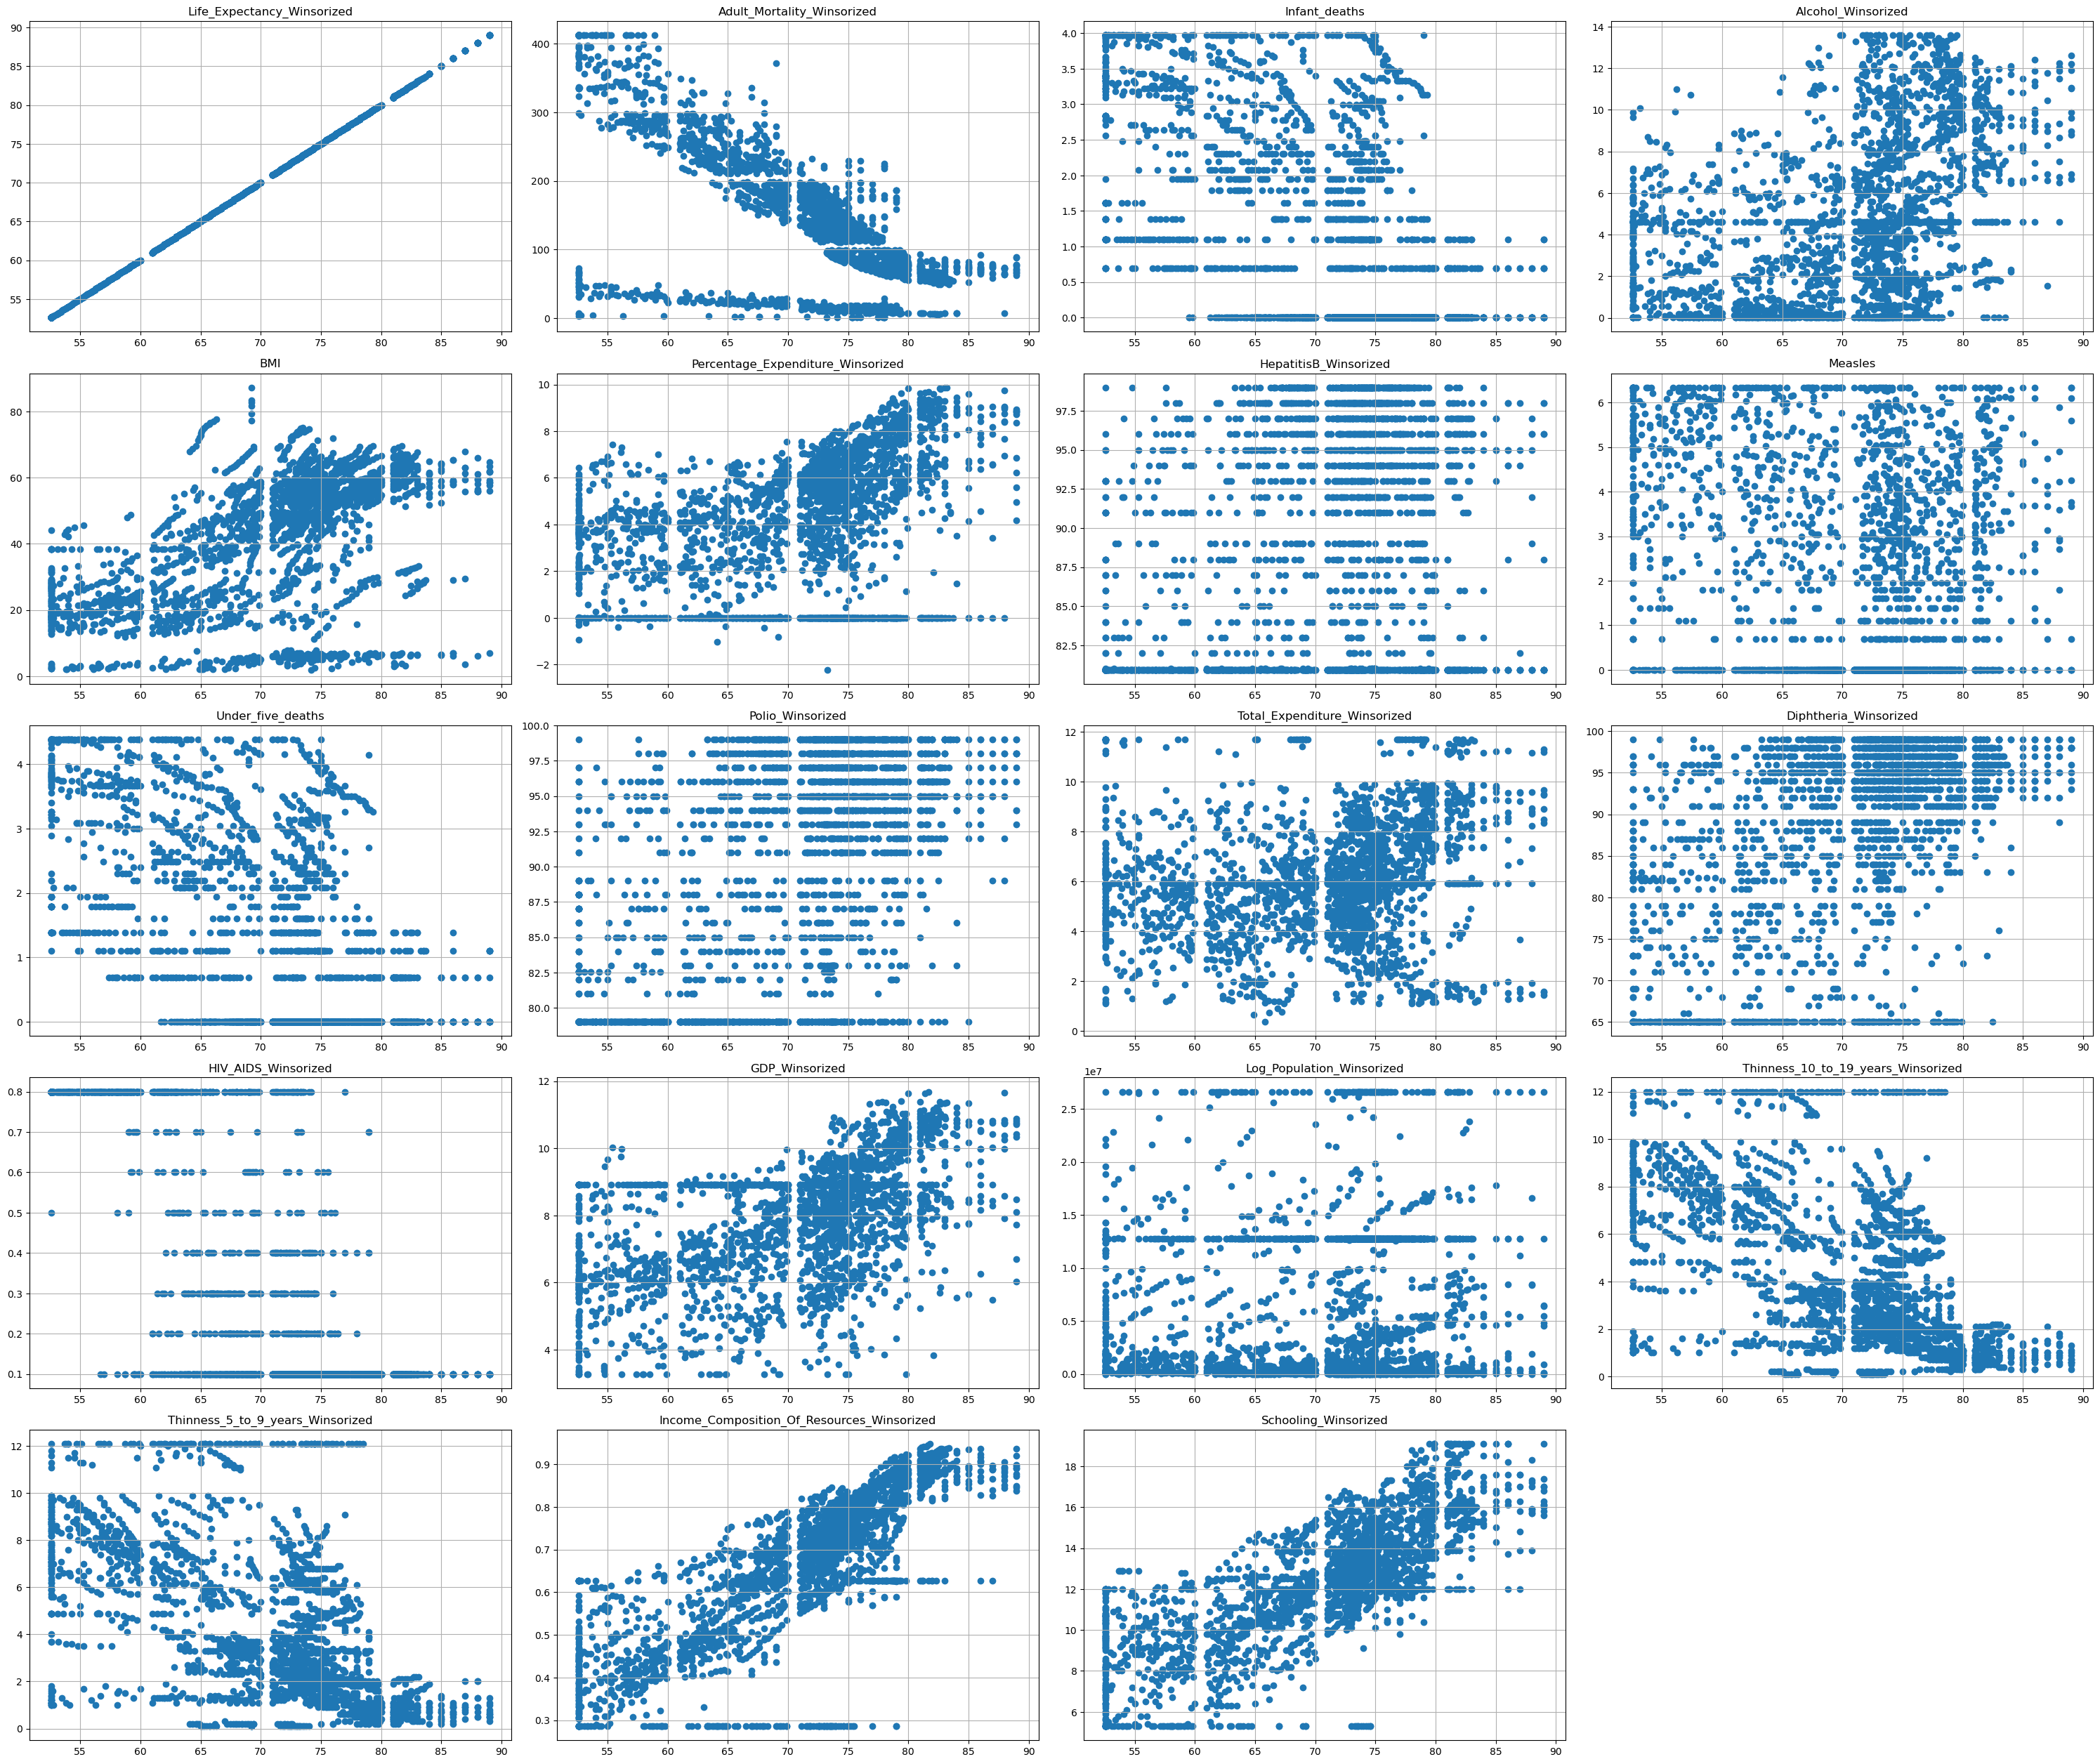

In [343]:
# Scatter plot of life expectancy against each of the other numerical variables

fig = plt.figure(figsize=(30, 30))
for i, variable in enumerate(cleaned_dataset.drop(columns=['Country', 'Status', 'Year']).columns, start=1):
    plt.subplot(6, 4, i)
    plt.scatter(cleaned_dataset["Life_Expectancy_Winsorized"], df[variable])
    plt.title(variable)
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

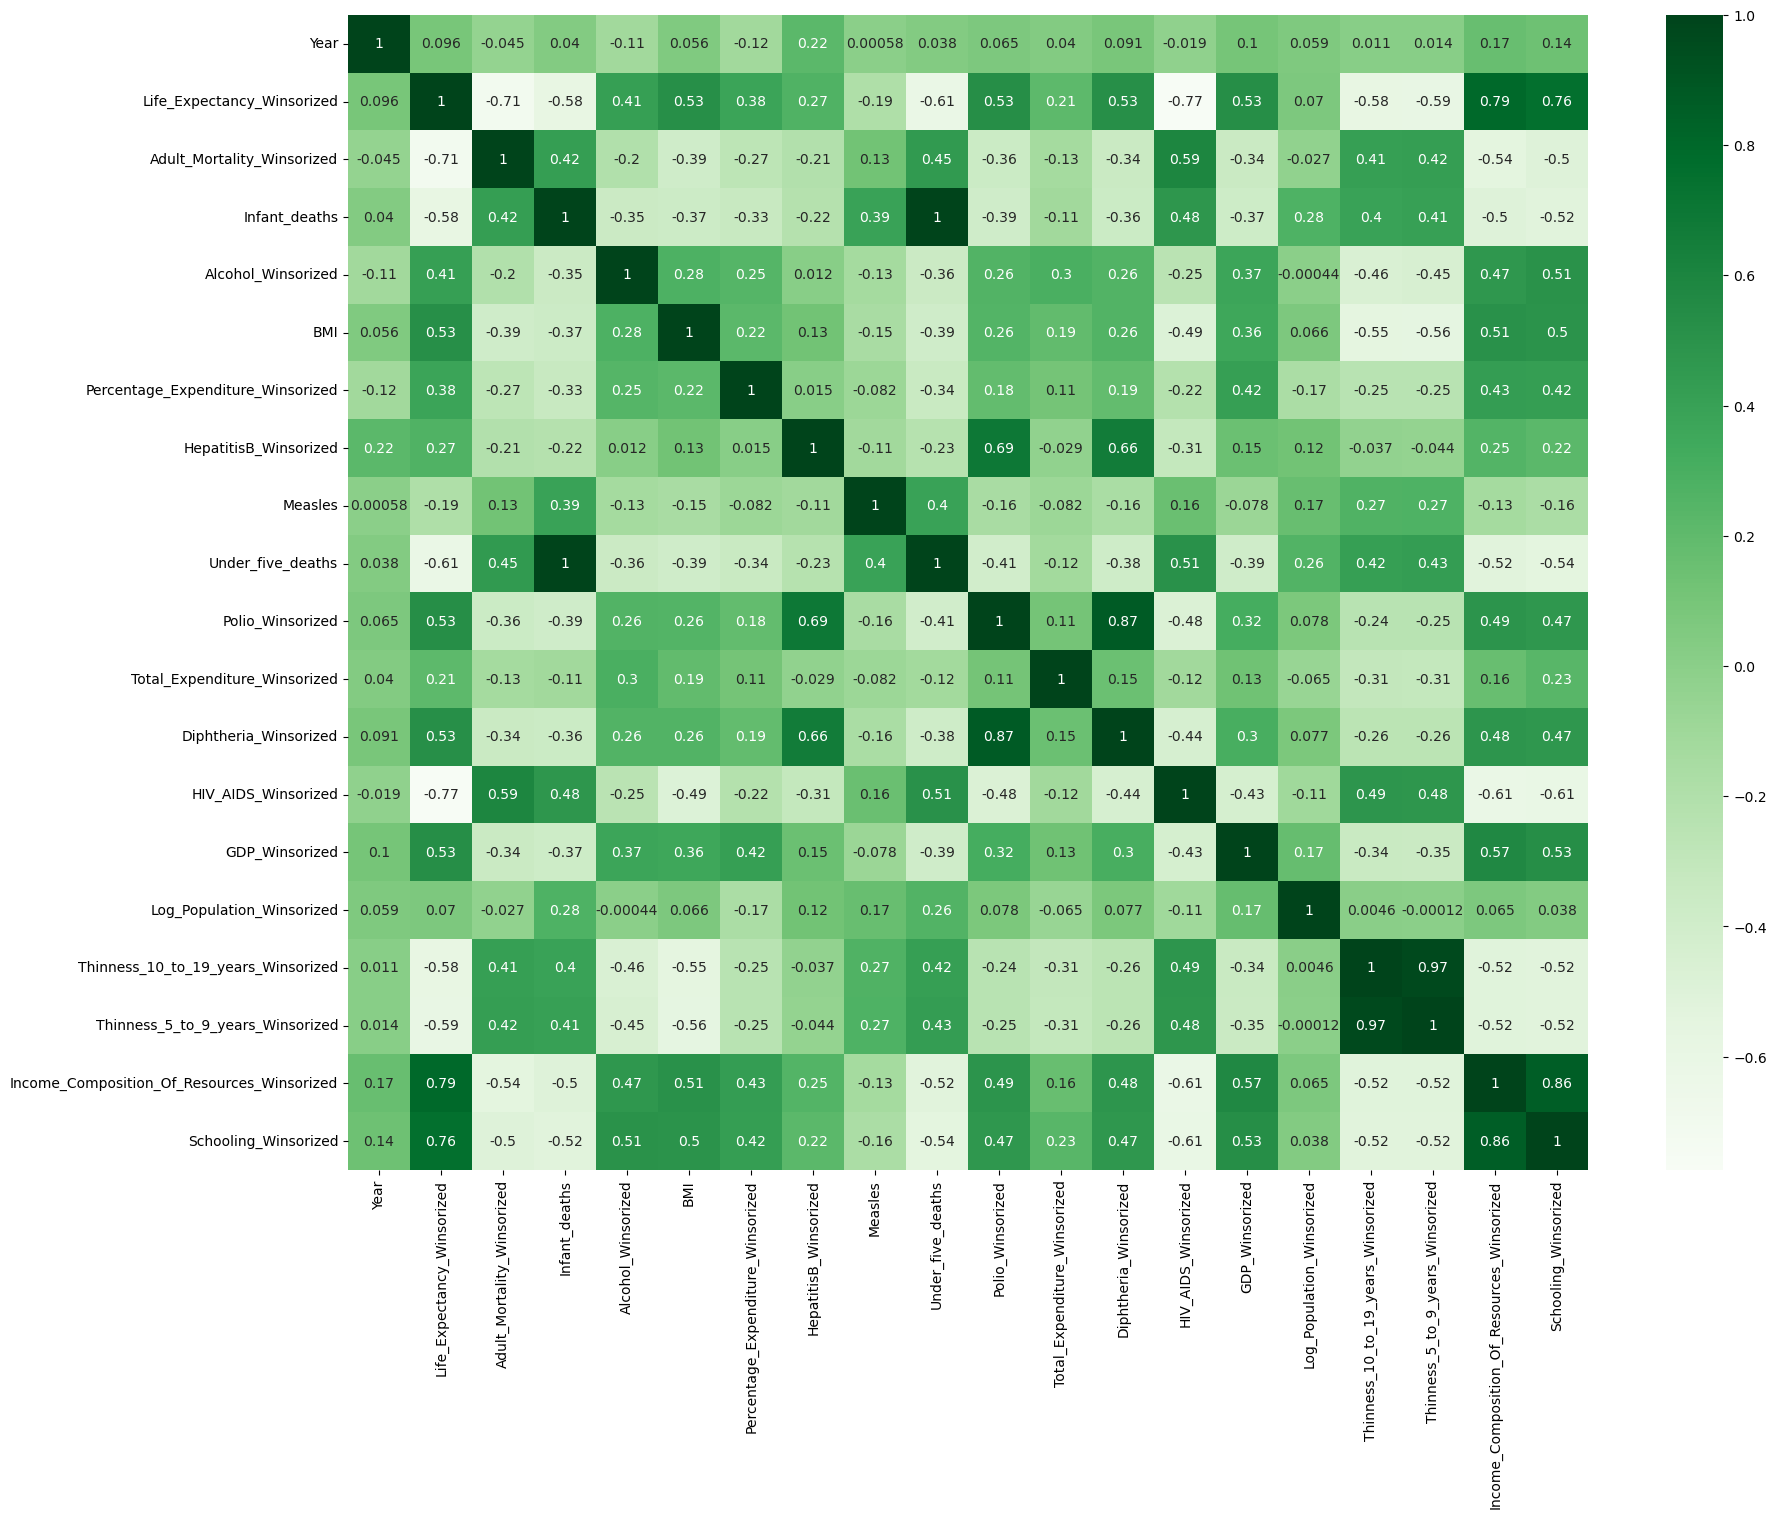

In [344]:
# Heatmap of correlations between the columns

plt.figure(figsize=(20, 15))
correlation_df = cleaned_dataset.drop(['Country', 'Status'], axis=1).corr()
sns.heatmap(correlation_df, annot=True, cmap='Greens')
plt.show()

The 2 cells above indicate the correlations between a predictor and the other predictors. In the case of life expectancy, we can see that it has strong positive correlation with *Income_Composition_Of_resources* and *Schooling*. To a lesser extent, it is also affected positively by *Polio*, and *Diphtheria*. This is because polio and diphtheria immunization greatly reduces the chances of children dying from those ailments. It turns out that public heathcare expenditure is not the most important predictor determining life expectancy (weakly positively correlated by 0.22).

Life expectancy is also observed to be strongly negatively correlated with *Adult_mortality*, *HIV/AIDS*, *Thinness_10-19_Years*, and *Thinness_5-9_Years*. 

# ML Modeling

## Data Preparation 

Since we want to observe, not only the models' performances but also, feature importances according to the models, we decided not to use dimenasionality reduction methods like PCA. While the methods may likely improve performance, we would not be able to see the specific features that the models find important.

In [345]:
# Creating dummy variables for the 'Status' column
cleaned_dataset = pd.get_dummies(cleaned_dataset, columns=['Status'])

# Dropping the 'Country' and 'Year' columns as they are not needed for training or testing
cleaned_dataset = cleaned_dataset.drop(['Country', 'Year'], axis=1)

In [346]:
# Checking the shape of the cleaned dataset
cleaned_dataset.shape

(2413, 21)

In [347]:
# Scaling the dataset using StandardScaler
scaler = StandardScaler()
dataset_scale = pd.DataFrame(scaler.fit_transform(cleaned_dataset), columns=cleaned_dataset.columns)

# Displaying the first few rows of the scaled dataset
dataset_scale.head()

,Life_Expectancy_Winsorized,Adult_Mortality_Winsorized,Infant_deaths,Alcohol_Winsorized,BMI,Percentage_Expenditure_Winsorized,HepatitisB_Winsorized,Measles,Under_five_deaths,Polio_Winsorized,...,Diphtheria_Winsorized,HIV_AIDS_Winsorized,GDP_Winsorized,Log_Population_Winsorized,Thinness_10_to_19_years_Winsorized,Thinness_5_to_9_years_Winsorized,Income_Composition_Of_Resources_Winsorized,Schooling_Winsorized,Status_Developed,Status_Developing
0,-1.274606,1.128395,2.018291,-1.242989,-1.149845,0.060639,-1.115098,1.759139,2.020391,-1.580908,...,-2.128493,-0.645931,-0.817201,-0.843135,2.488623,2.499307,-1.072504,-0.837216,-0.495723,0.495723
1,-1.274606,1.100157,2.018291,-1.242989,-1.175442,0.059164,-1.115098,1.700813,2.020391,-1.580908,...,-2.128493,-0.645931,-0.799737,2.700659,2.488623,2.499307,-1.107749,-0.871287,-0.495723,0.495723
2,-1.616902,1.335479,2.018291,-1.240429,-1.395573,-0.497581,-1.115098,1.735629,2.020391,-1.580908,...,-2.128493,-0.645931,-1.403692,2.362849,2.488623,2.499307,-1.630547,-1.927502,-0.495723,0.495723
3,-1.652312,1.354305,2.018291,-1.242989,-1.416051,-0.611940,-1.115098,1.820577,2.020391,-1.580908,...,-2.128493,-0.645931,-1.459467,-0.568605,2.488623,2.499307,-1.677540,-2.029716,-0.495723,0.495723
4,0.838191,-0.725943,-0.841928,-0.067688,0.867177,0.630313,1.370864,-0.924976,-0.865548,1.091928,...,0.920453,-0.645931,0.246466,-0.883387,-0.889000,-0.849990,0.607497,0.593785,-0.495723,0.495723


In [348]:
# Dividing the dataset into features (X) and label (Y)
X = dataset_scale.drop(['Life_Expectancy_Winsorized'], axis=1)
Y = cleaned_dataset['Life_Expectancy_Winsorized']

In [349]:
# Splitting the dataset into 80% set of train features and labels, and 20% set of test features and labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression Model

In [350]:
# Creating a linear regression model
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, Y_train)

# Training and predicting with the model
y_preds_train = linearRegressionModel.predict(X_train)
y_preds_test = linearRegressionModel.predict(X_test)

# Extracting feature importances
lr_feature_importances = pd.DataFrame(linearRegressionModel.coef_)
lr_features = pd.concat([lr_feature_importances, pd.Series(X_train.columns)], axis=1)
lr_features.columns = ['Importance', 'Feature']
lr_features = lr_features.sort_values('Importance')

In [351]:
# Printing the model's performance metrics for the test set
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(linearRegressionModel.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test, y_preds_test))))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))
print(f"Explained Variance Score: {explained_variance_score(y_pred=linearRegressionModel.predict(X_train), y_true=Y_train)}")

-----Test set statistics-----
R-squared of the model in the test set is: 0.8493354931912079
Mean absolute error of the prediction is: 2.46581050297821
Mean squared error of the prediction is: 10.616987359565796
Root mean squared error of the prediction is: 3.2583718878553127
Mean absolute percentage error of the prediction is: 3.5798230723015725
Explained Variance Score: 0.8378605963217526


## SVM Regressor

In [352]:
# Creating another model using a Support Vector Regressor (SVR)
svr_reg = SVR(kernel='rbf', C=10, epsilon=0.00001)
svr_reg.fit(X_train, Y_train)
y_predict_svr = svr_reg.predict(X_test)

In [353]:
# Printing the model's performance metrics for the SVR model on the test set
print("-----Test set statistics-----")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_predict_svr)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, y_predict_svr)))
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test, y_predict_svr))))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_predict_svr) / Y_test)) * 100))
print(f"Explained Variance Score: {explained_variance_score(y_pred=svr_reg.predict(X_train), y_true=Y_train)}")

-----Test set statistics-----
Mean absolute error of the prediction is: 1.436673698109032
Mean squared error of the prediction is: 4.8114771274996455
Root mean squared error of the prediction is: 2.1935079501792663
Mean absolute percentage error of the prediction is: 2.0877595527927792
Explained Variance Score: 0.9546116490501848


## Random Forest Regressor

In [354]:
# Creating a third model using a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)
regressor.fit(X_train, Y_train)

# Predicting with the Random Forest Regressor
y_pred_random = regressor.predict(X_test)

# Extracting feature importances from the Random Forest model
rf_feature_importances = pd.DataFrame(regressor.feature_importances_)
rf_features = pd.concat([rf_feature_importances, pd.Series(X_train.columns)], axis=1)
rf_features.columns = ['Importance', 'Feature']
rf_features = rf_features.sort_values('Importance')

In [355]:
# Printing the model's performance metrics for the Random Forest Regressor on the test set
print("-----Test set statistics-----")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_pred_random)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(Y_test, y_pred_random)))
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test, y_pred_random))))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))
print(f"Explained Variance Score: {explained_variance_score(y_pred=regressor.predict(X_train), y_true=Y_train)}")

-----Test set statistics-----
Mean absolute error of the prediction is: 1.0867187240493643
Mean squared error of the prediction is: 2.8728997682696487
Root mean squared error of the prediction is: 1.6949630580840542
Mean absolute percentage error of the prediction is: 1.5747734946251055
Explained Variance Score: 0.9940732986887324


In [356]:
# Sorting the correlation dataframe and creating bar plots for feature importances
correlation_df = correlation_df.sort_values('Life_Expectancy_Winsorized')

# Plotting feature importances according to statistics
fig_stat = px.bar(correlation_df.Life_Expectancy_Winsorized[:-1], height=600)
fig_stat.update_layout(
    title='Feature Importances According to Statistics',
    xaxis_title='Feature',
    yaxis_title='Importance'
)
fig_stat.show()

# Plotting linear model feature importances
fig_lr = px.bar(lr_features, x='Feature', y='Importance', height=600)
fig_lr.update_layout(
    title='Linear Model Feature Importances',
    xaxis_title='Feature',
    yaxis_title='Importance'
)
fig_lr.show()

# Plotting random forest model feature importances
fig_rf = px.bar(rf_features,  x='Feature', y='Importance', height=600)
fig_rf.update_layout(
    title='Random Forest Model Feature Importances',
    xaxis_title='Feature',
    yaxis_title='Importance'
)
fig_rf.show()

# ANSWERS TO QUESTIONS AND CONCLUSION

The analyses conducted reveal that certain initially selected predicting factors exhibit minimal influence on life expectancy. Notably, government expenditure on healthcare, population size, and rates of infant measles contribute little to variations in life expectancy across countries.

From the statistical analyses, life expectancy emerges as significantly and positively impacted by a country's Human Development Index (HDI) and the average years of schooling among its citizens. Additionally, positive associations are observed, albeit to a lesser extent, with a country's GDP, immunization rates against polio and diphtheria, and the average Body Mass Index (BMI) of its residents. Conversely, strong negative influences on life expectancy include adult mortality rates and the number of HIV-related deaths among children under 5. Less prominent but negatively correlated factors involve thinness prevalence among 5-9 and 10-19 year-olds. It's noteworthy that machine learning models sometimes assign some features a significantly less impactful role in determining life expectancy.

Public healthcare spending displays a weak correlation with life expectancy, suggesting that investing in other influential factors may yield more substantial improvements in a country's life expectancy.

Adult mortality emerges as a potent negative factor significantly impacting life expectancy, overshadowing the relatively less influential effect of infant mortality.

Lifestyle choices, such as dietary habits and exercise influencing BMI, exhibit a moderately strong positive correlation with life expectancy. Similarly, alcohol consumption shows a notable positive correlation, possibly linked to higher income levels among individuals with increased alcohol consumption.

Schooling stands out as a crucial predictor in the dataset, demonstrating a robust positive correlation and high importance in machine learning models. Countries prioritizing investments in education are likely to witness considerable improvements in life expectancy.

Population size demonstrates minimal significance in relation to life expectancy, indicating that other factors play more substantial roles in determining a country's life expectancy.

| **MODEL**                   | **Mean absolute error** | **Mean squared error** | **Root mean squared error** | **Mean absolute percentage error** | **Explained Variance Score** |
|-----------------------------|-------------------------|------------------------|-------------------------------|-------------------------------------|-------------------------------|
| **LINEAR MODEL**            | 2.512                   | 11.689                 | 3.419                         | 3.728%                              | 0.835                         |
| **SUPPORT VECTOR REGRESSOR** | 1.474                   | 5.807                  | 2.410                         | 2.190%                              | 0.955                         |
| **RANDOM FOREST REGRESSOR**  | 1.109                   | 3.349                  | 1.830                         | 1.627%                              | 0.993                         |
